# Imports + Data

In [ ]:
%%capture
!gdown --id 1x2XIewHy4FAcZmPrKXJ1kqzSQsOArug5 # Air Passengers
#!gdown --id 1x3pqL_Y_FwgnPk0jZYXPRW1JGuVCxfVm # Month Value
#!gdown --id 1x3ZDoY9QN7i1_2VN8qyzsPF2qjxVkoOk # Signal

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [ ]:
df_sinal = pd.read_csv('/content/signal_1.csv')
df_sinal.head()

,sinal
0,-38.0
1,-40.0
2,-39.0
3,-40.0
4,-40.0


In [ ]:
df_passageiros = pd.read_csv('/content/AirPassengers.csv')
df_passageiros.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df_month_value = pd.read_csv('/content/Month_Value_1.csv')
df_month_value.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


# Passageiros
Compra de passagens por mês

In [ ]:
x = df_passageiros['Month']
y = df_passageiros['#Passengers']

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y,
                    mode='lines+markers',
                    name='lines+markers'))

fig.show()

## Decomposição

In [ ]:
df_passageiros.head(3)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



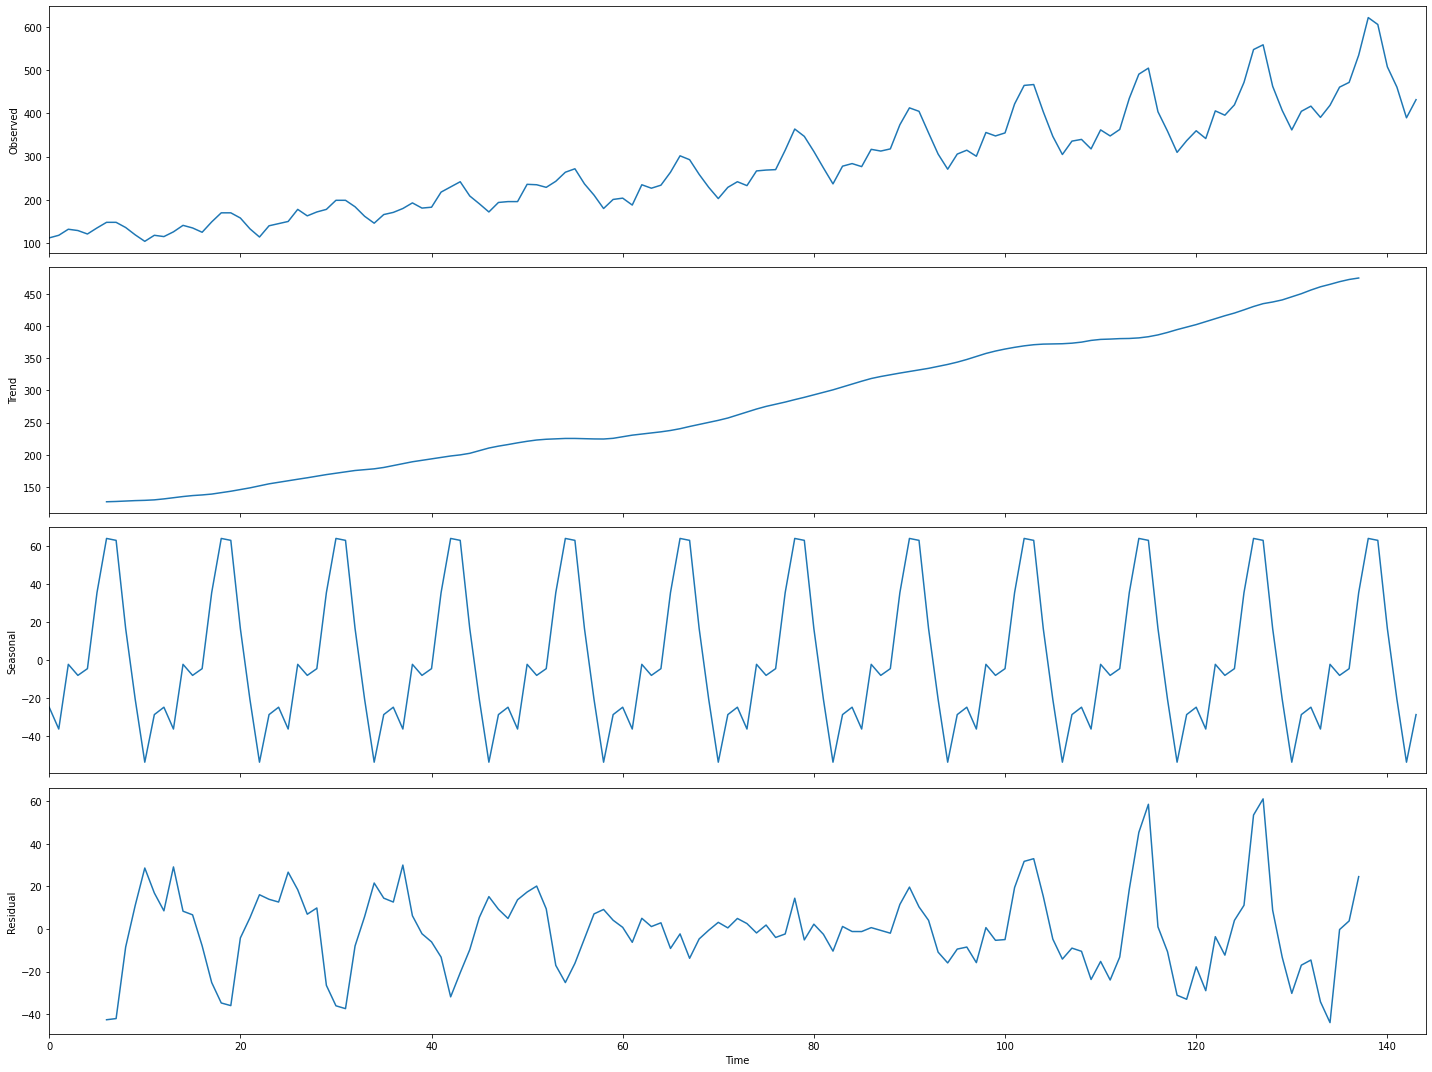

In [ ]:
# .values pega o Array
resultado_decomposicao_adicao = seasonal_decompose(df_passageiros['#Passengers'].values, model = 'additive', freq = 12)

plt.rcParams.update({'figure.figsize': (20, 15)})
resultado_decomposicao_adicao.plot().show()

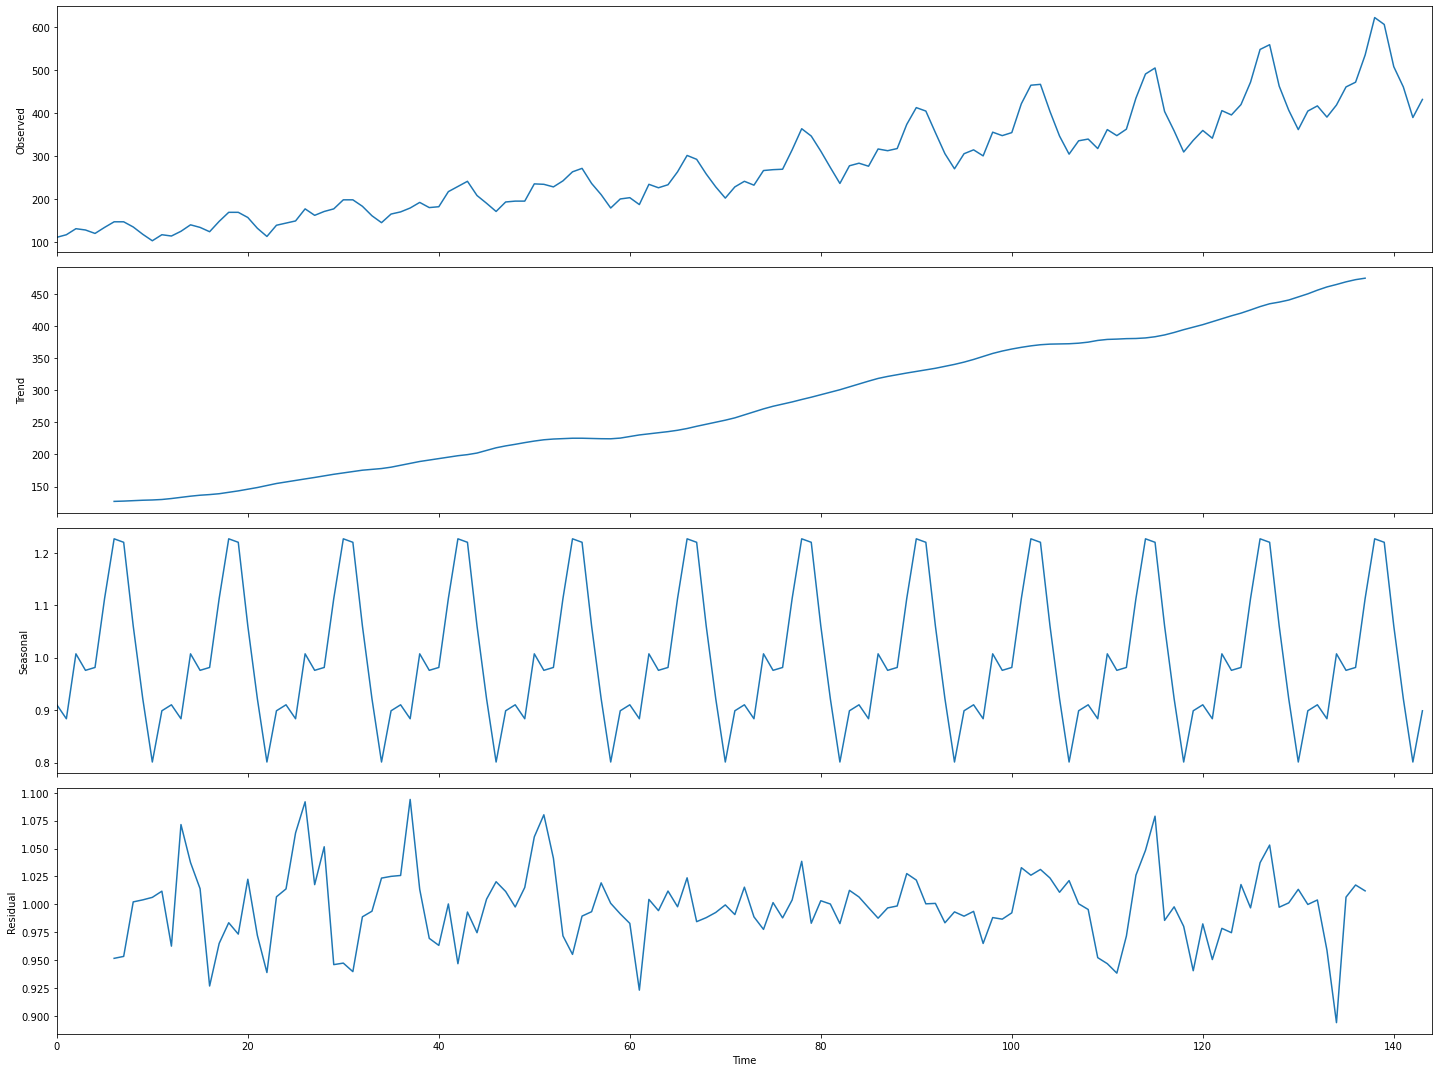

In [ ]:
resultado_decomposicao_multiplicacao = seasonal_decompose(df_passageiros['#Passengers'].values, model = 'multiplicative', freq = 12)

plt.rcParams.update({'figure.figsize': (20, 15)})
resultado_decomposicao_multiplicacao.plot().show()

## Introdução a RNN

In [ ]:
n_treino = 105
time_steps = 12 #Usado no exemplo em aula

df_train_set = df_passageiros['#Passengers'][:105]

# Necessito que no meu conjunto de teste, esteja contido parte do meu treino
df_test_set = df_passageiros['#Passengers'][n_treino - time_steps:] 

In [ ]:
df_train_set[-5:]

100    355
101    422
102    465
103    467
104    404
Name: #Passengers, dtype: int64

In [ ]:
df_test_set[:5]

93    306
94    271
95    306
96    315
97    301
Name: #Passengers, dtype: int64

## Treino e Teste

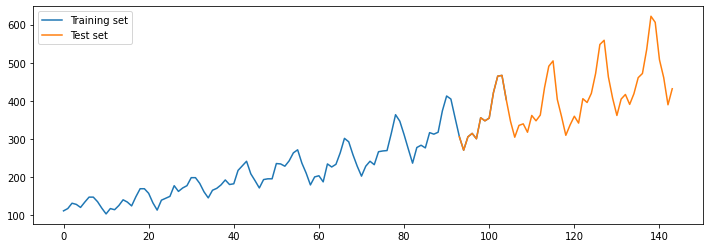

In [ ]:
#Grafico
df_train_set.plot( figsize=(12,4), legend=True )
df_test_set.plot(legend=True)
plt.legend( ['Training set' , 'Test set' ] )

## Normalização

In [ ]:
train_array = df_train_set.values
test_array = df_test_set.values

In [ ]:
train_set = train_array.reshape(-1, 1)
test_set = test_array.reshape(-1, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler( feature_range = (0,1) )

train_set_norm = sc.fit_transform(train_set)
test_set_norm = sc.transform(test_set)

### Explicação do Reshape
Vamos conversar sobre esse Reshape

In [ ]:
array_temp = train_array

In [ ]:
array_temp.size

105

In [ ]:
array_temp[0], array_temp[104]

(112, 404)

In [ ]:
array_temp[-1]

404

In [ ]:
array_temp.shape

(105,)

In [ ]:
# Tudo o que era coluna, vira linha em 1 coluna somente. (Igual ao exemplo usado -> -1 / 1)
array_temp.reshape(array_temp.size, 1)

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

## Criando o X

In [ ]:
n_samples = train_set.size

x_train = []
y_train = []

for i in range( time_steps, n_samples ):
                                # linhas              # colunas
  x_train.append( train_set_norm[ (i - time_steps):i , 0 ]  )
  y_train.append( train_set_norm[ i,0] )

x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
n_samples = test_set_norm.size

x_test = []
y_test = []

for i in range( time_steps, n_samples ):
                                # linhas              # colunas
    x_test.append( test_set_norm[ (i - time_steps):i , 0 ]  )
    y_test.append( test_set_norm[ i,0] )

x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
#x_train_alternative = []
#y_train_alternative = []

#for j in range(time_steps, n_samples):
  #x_train_alternative.append(df_passageiros['#Passengers'].iloc[(j - time_steps):j].values)
  #y_train_alternative.append(df_passageiros['#Passengers'].iloc[j])

#x_train = np.array(x_train_alternative)
#y_train = np.array(y_train_alternative)

In [ ]:
#x_test = []
#y_test = []

#n_samples = df_test_set.shape[0]

#for j in range( time_steps, n_samples ):
  #  x_test.append(df_test_set.iloc[(j - time_steps):j].values)
  #  y_test.append(df_test_set.iloc[j])

#x_test = np.array(x_test)
#y_test = np.array(y_test)

## Entrada 3D

Minhas outras features devem seguir o mesmo padrão da principal (caso eu tenha)

Shape -> (n_samples, time_steps, n_features)

In [ ]:
x_train.shape

(93, 12)

In [ ]:
n_features = 1 # Nesse caso em específico

x_train_3D = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_features))
x_test_3D = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_features))

## API FUNCIONAL

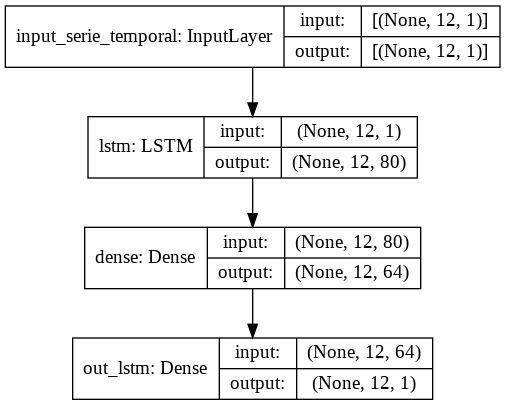

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model
import keras

Input_series = keras.Input(shape = (time_steps, n_features), name = 'input_serie_temporal')
x_lstm = LSTM(units = 80, return_sequences = True) (Input_series)
drpt = Dropout(0.3)(x_lstm)
x_lstm = Dense(64, activation='relu')(x_lstm)
output = Dense(1, activation='sigmoid', name = 'out_lstm')(x_lstm)

model = keras.Model(
    inputs = [Input_series],
    outputs = [output]
)

plot_model(model, show_shapes = True) 

In [ ]:
model.compile( optimizer='adam', loss= 'mean_squared_error', metrics = ['mse', 'mae'])

In [ ]:
history = model.fit(
    x = x_train_3D,
    y = y_train,
    batch_size = 16,
    epochs = 250,
    validation_data = (x_test_3D, y_test)
)

Epoch 1/250
6/6 [==============================] - 3s 122ms/step - loss: 0.0634 - mse: 0.0634 - mae: 0.2157 - val_loss: 0.1919 - val_mse: 0.1919 - val_mae: 0.3792
Epoch 2/250
6/6 [==============================] - 0s 18ms/step - loss: 0.0609 - mse: 0.0609 - mae: 0.2104 - val_loss: 0.2039 - val_mse: 0.2039 - val_mae: 0.3949
Epoch 3/250
6/6 [==============================] - 0s 13ms/step - loss: 0.0563 - mse: 0.0563 - mae: 0.2006 - val_loss: 0.1977 - val_mse: 0.1977 - val_mae: 0.3880
Epoch 4/250
6/6 [==============================] - 0s 13ms/step - loss: 0.0499 - mse: 0.0499 - mae: 0.1868 - val_loss: 0.1786 - val_mse: 0.1786 - val_mae: 0.3641
Epoch 5/250
6/6 [==============================] - 0s 13ms/step - loss: 0.0411 - mse: 0.0411 - mae: 0.1679 - val_loss: 0.1501 - val_mse: 0.1501 - val_mae: 0.3229
Epoch 6/250
6/6 [==============================] - 0s 13ms/step - loss: 0.0316 - mse: 0.0316 - mae: 0.1409 - val_loss: 0.1190 - val_mse: 0.1190 - val_mae: 0.2753
Epoch 7/250
6/6 [==========

In [ ]:
plt.plot( history.history['loss'], label = "Treino" )
plt.plot( history.history['val_loss'], label = "Validação" )
plt.legend()

In [ ]:
y_predict = model.predict(x_test_3D)
y_predict[:10]

In [ ]:
#plt.plot(y_test, color='red',label='Real')

In [ ]:
x = df_passageiros['Month'][-len(y_test):]
y_real = y_test
y_pred = y_predict.reshape(len(y_test),)

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x = x, y = y_real,

                    mode='lines+markers',

                    name='Real'))

fig.add_trace(go.Scatter(x = x, y = y_pred,

                    mode='lines+markers',

                    name='Previsão'))

fig.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model

Input_series = keras.Input(shape = (time_steps, n_features), name = 'input_serie_temporal')
x_lstm = LSTM(units = 80, return_sequences = True) (Input_series)
x_lstm_1 = LSTM(units = 160, return_sequences = True, activation = 'relu') (Input_series)

drpt = Dropout(0.3)(x_lstm)
output = layers.concatenate([drpt, x_lstm_1])

model = keras.Model(
    inputs = [Input_series],
    outputs = [output]
)

plot_model(model, show_shapes = True) 